<a href="https://colab.research.google.com/github/Farah14-lab/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Buat Gamma Correction sesuai dengan petunjuk berikut**


In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


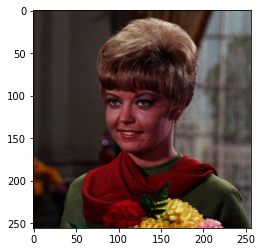

In [7]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/PCVK/imanges/female.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

Gamma Correction Pada Citra
---------------------------
Masukkan Nilai Gamma: 3


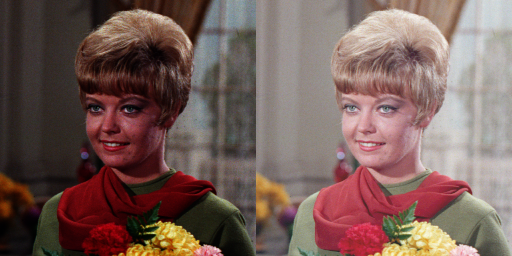

In [10]:
print('Gamma Correction Pada Citra')
print('---------------------------')
try :
  gamma = int(input('Masukkan Nilai Gamma: '))
except ValueError:
  print('Error, not a number');

original = cv.imread('/content/drive/MyDrive/PCVK/imanges/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for x in range(original.shape[0]):
  for y in range(original.shape[1]):
    for z in range(original.shape[2]):
     gamma_image[x,y,z] = np.clip(255 * pow(original[x,y,z]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)  

**2. Buat Simulasi Image Depth**

 bitdepth Correction pada citra 
----------------------------------
Masukkan nilai Depth: 3


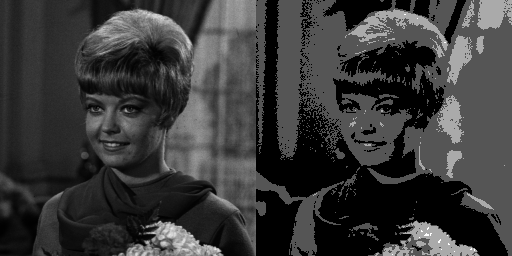

In [12]:
print(' bitdepth Correction pada citra ')
print('----------------------------------')
try:
  bd = float(input('Masukkan nilai Depth: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/imanges/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255);
     
final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

**3. Buat modul Average Denoising**

Jumlah Citra di Average 5

Nilai MSE adalah 114.81576360887097 (dB)
Nilai PSNR adalah 27.53078842332414 (dB)

Image Original                           Image Hasil


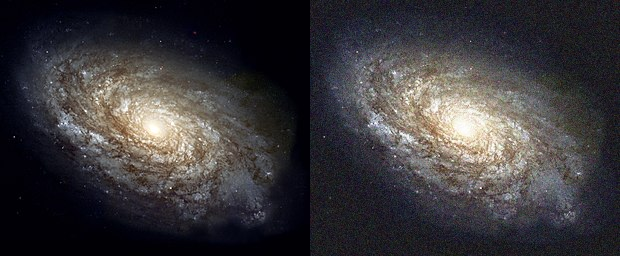

In [20]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/PCVK/imanges/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/imanges/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
        return 5
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Image Original                           Image Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Jumlah Citra di Average 30

Nilai MSE adalah 115.06271421370968 (dB)
Nilai PSNR adalah 27.521457464875404 (dB)

Image Original                           Image Hasil


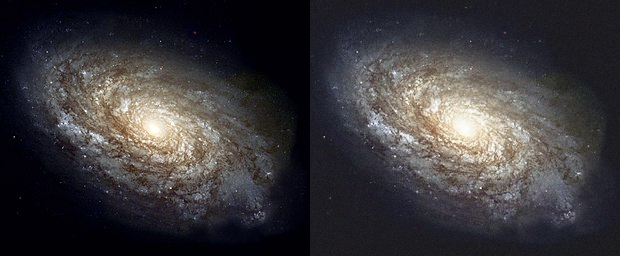

In [22]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/PCVK/imanges/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/imanges/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 29 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0): 
        return 30
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Image Original                           Image Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Jumlah Citra di Average 60

Nilai MSE adalah 115.78408518145162 (dB)
Nilai PSNR adalah 27.494314922612162 (dB)

Image Original                           Image Hasil


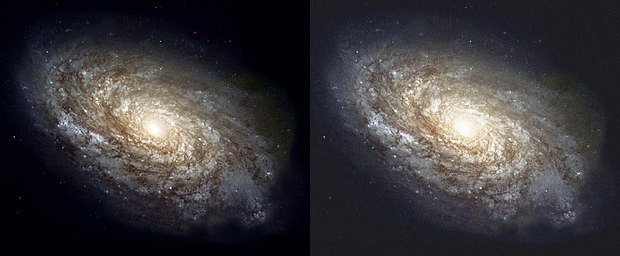

In [23]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/PCVK/imanges/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/imanges/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 59 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
        return 60
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Image Original                           Image Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Jumlah Citra di Average 80

Nilai MSE adalah 115.36200016801075 (dB)
Nilai PSNR adalah 27.510175835480407 (dB)

Image Original                           Image Hasil


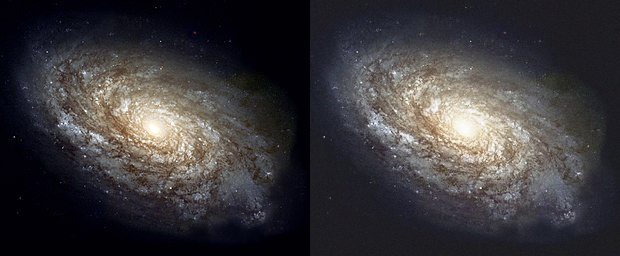

In [24]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/PCVK/imanges/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/imanges/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
        return 60
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Image Original                           Image Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Jumlah Citra di Average 100

Nilai MSE adalah 115.34421622983871 (dB)
Nilai PSNR adalah 27.51084538538248 (dB)

Image Original                           Image Hasil


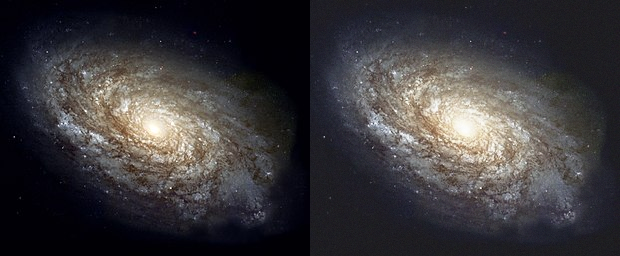

In [25]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/PCVK/imanges/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/imanges/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
        return 60
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Image Original                           Image Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

**4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:**

In [ ]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/imanges/couple.tiff')

mask1 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask1,(100,300),80,(255,255,255),-1)

mask2 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask2,(270,90),80,(255,255,255),-1)
result = img_t & (mask1 + mask2)

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)